In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, kelbow_visualizer
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')


data = datasets.load_wine()


df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

PCA_df = PCA(n_components=2)
PCA_df.fit(df)

PCA(n_components=2)

In [37]:
transform_df = PCA_df.fit_transform(df)
print(PCA_df.explained_variance_ratio_)

[0.99809123 0.00173592]


In [38]:
model_k = KMeans(n_clusters=3)
model_k.fit(transform_df)

KMeans(n_clusters=3)

In [39]:
labels = model_k.predict(transform_df)

In [6]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(f" adjusted_mutual_info_score: {metrics.adjusted_mutual_info_score(y, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(transform_df, labels):.3f}")

print(f'coef inertial: {model_k.inertia_}')

Homogeneity: 0.429
Completeness: 0.429
V-measure: 0.429
Adjusted Rand Index: 0.371
 adjusted_mutual_info_score: 0.423
Silhouette Coefficient: 0.572
coef inertial: 2367716.086106179


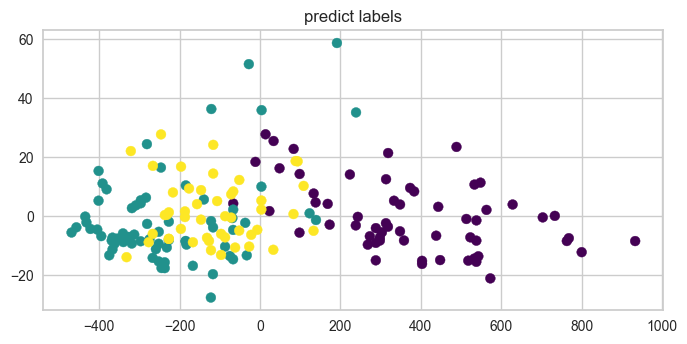

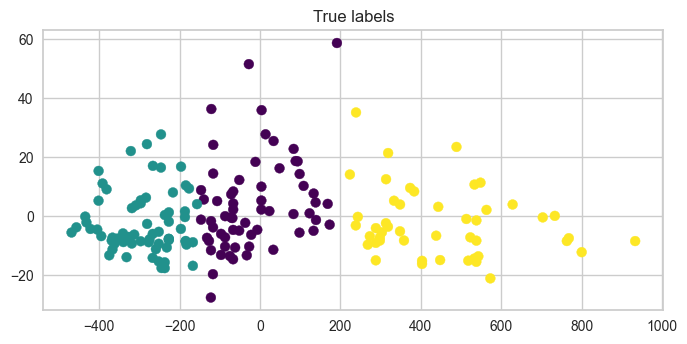

In [7]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.scatter(transform_df[:, 0], transform_df[:, 1], c=y, cmap='viridis', s=50)
plt.title('predict labels')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(transform_df[:, 0], transform_df[:, 1], c=labels, cmap='viridis', s=50)
plt.title('True labels')
plt.show()

------------

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

## find best parameters to DBSCAN model

param_grid = {
    'eps': np.linspace(1.0, 5.0, 10),
    'min_sample': range(1, 10)
}


best_score = -1
best_param = None


for param in ParameterGrid(param_grid):
    model = DBSCAN(eps=param['eps'], min_samples=param['min_sample'])
    labels_ = model.fit_predict(transform_df)
    
    if len(set(labels_)) <= 1:
        continue
        
    score = metrics.silhouette_score(transform_df, labels_)
    if score > best_score:
        best_score = score
        best_param = param
        
print('best param = ', best_param)
print('best score = ', best_score)

best param =  {'eps': 5.0, 'min_sample': 1}
best score =  0.1501933303722532


In [44]:
model_DBS = DBSCAN(eps=5.0, min_samples=1)
model_DBS.fit(transform_df)

DBSCAN(eps=5.0, min_samples=1)

In [45]:
labels_DBS = model_DBS.fit_predict(transform_df)

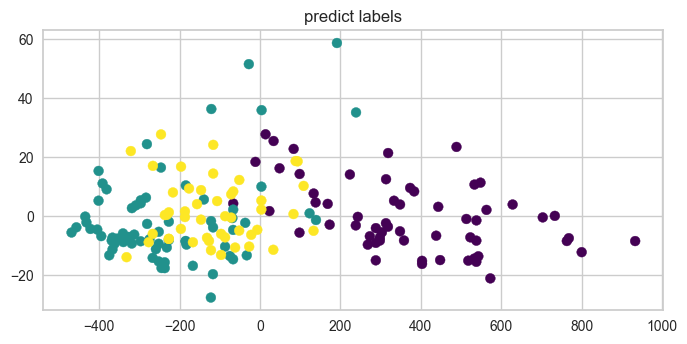

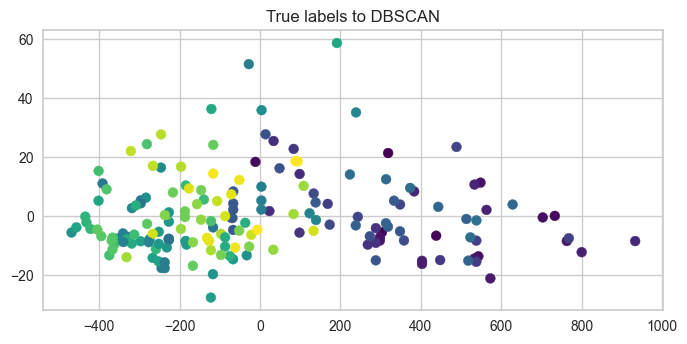

In [46]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.scatter(transform_df[:, 0], transform_df[:, 1], c=y, cmap='viridis', s=50)
plt.title('predict labels')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(transform_df[:, 0], transform_df[:, 1], c=labels_DBS, cmap='viridis', s=50)
plt.title('True labels to DBSCAN')
plt.show()

In [17]:
from sklearn.utils import resample
import random


n_subset = 5
cluster_results = []

for i in range(n_subset):
    X_subset = resample(transform_df, replace=True, n_samples=int(transform_df.shape[0] * 0.8))
    model_X_DBS = DBSCAN(eps=5.0, min_samples=1)
    labels_X_DBS = model_X_DBS.fit_predict(X_subset)
    cluster_results.append(labels_X_DBS)

print('cluster from subset: ', cluster_results)

cluster from subset:  [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  6, 15,
       16, 17, 18, 19, 13, 20, 21,  2, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,  0, 45,
       46, 47, 48, 49, 50, 51, 52, 34, 53, 16, 54, 55,  7, 56, 25, 57, 58,
       59,  9, 15, 15, 60, 61, 49, 62, 63, 35, 24, 64, 58, 65, 50, 66,  6,
       67, 18,  1,  7, 68, 51, 69, 51, 18,  1, 70, 71, 72, 73, 10, 23, 74,
       75, 24, 76, 23, 39, 77, 78, 20, 44,  4, 79, 80, 81, 82, 48,  3, 49,
       36, 28, 46, 83, 11, 77, 66, 48, 50, 84, 43, 85, 86,  6, 16,  4, 11,
       87, 75, 70, 88, 78,  9], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  1,  8,  9, 10, 11, 12, 13, 14, 15,
       13, 16, 17, 18, 19, 20, 21,  6, 22, 23, 24, 25, 26, 11, 27, 28,  1,
       29, 12, 30, 14,  8, 31, 32, 22, 33, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 24, 28, 46, 47, 48, 49,  1, 50, 51, 30, 52, 40,
       40, 53, 33, 33, 54, 55, 

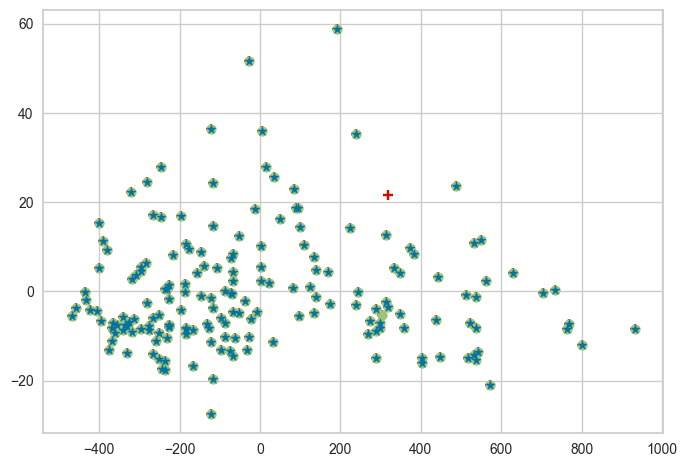

In [20]:

for i in range(0, transform_df.shape[0]):
    if model_DBS.labels_[i] == 0:
        c1 = plt.scatter(transform_df[i:, 0], transform_df[i:, 1], c='r', marker='+')
    elif model_DBS.labels_[i] == 1:
        c2 = plt.scatter(transform_df[i:, 0], transform_df[i:, 1], c='g', marker='o')
    elif model_DBS.labels_[i] == 2:
        c3 = plt.scatter(transform_df[i:, 0], transform_df[i:, 1], c='b', marker='*')
    elif model_DBS.labels_[i] == -1:
        c3 = plt.scatter(transform_df[i:, 0], transform_df[i:, 1], c='y', marker='d')

---------------------

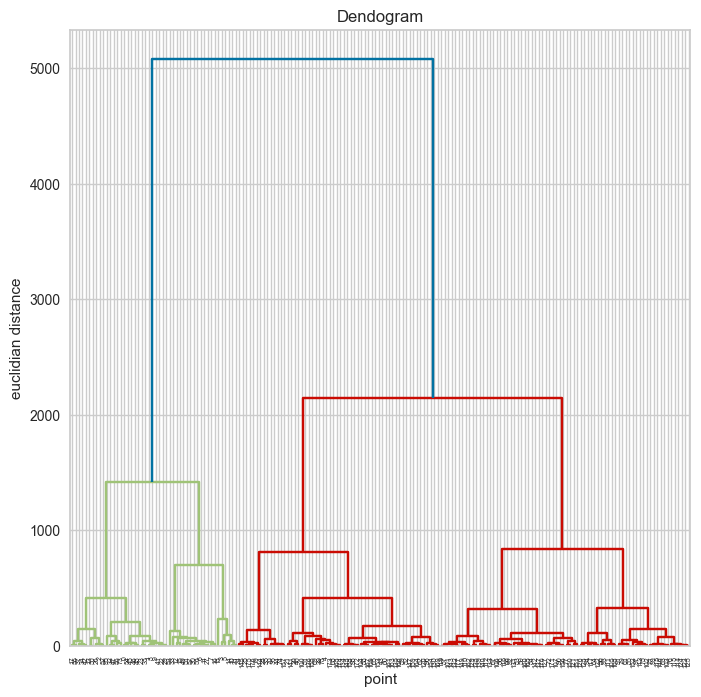

In [21]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage


model_hierarchy = linkage(transform_df, method='ward')


plt.figure(figsize=(8, 8))
dendrogram(model_hierarchy,
           orientation='top',
           distance_sort='descenting',
           show_leaf_counts=True, leaf_rotation=90)

plt.title('Dendogram')
plt.xlabel('point')
plt.ylabel('euclidian distance')
plt.show()

In [25]:
clusters = fcluster(model_hierarchy, t=3, criterion='maxclust')

for i, cluster in enumerate(clusters):
    print(f'index = {i} | data = {transform_df[i]} | cluster {cluster}')

index = 0 | data = [318.56297929  21.49213073] | cluster 1
index = 1 | data = [303.09741966  -5.36471768] | cluster 1
index = 2 | data = [438.06113292  -6.53730945] | cluster 1
index = 3 | data = [7.33240139e+02 1.92729032e-01] | cluster 1
index = 4 | data = [-11.5714285   18.48999461] | cluster 2
index = 5 | data = [ 7.03231192e+02 -3.32158674e-01] | cluster 1
index = 6 | data = [542.97158087 -13.51896664] | cluster 1
index = 7 | data = [548.40185984  11.44943238] | cluster 1
index = 8 | data = [298.0368628   -8.18015784] | cluster 1
index = 9 | data = [298.04955314  -7.10154294] | cluster 1
index = 10 | data = [763.07971194  -8.33431723] | cluster 1
index = 11 | data = [532.94322773 -14.28763377] | cluster 1
index = 12 | data = [572.83441039 -21.00501433] | cluster 1
index = 13 | data = [402.92535829 -16.10263522] | cluster 1
index = 14 | data = [800.05339386 -12.11844719] | cluster 1
index = 15 | data = [563.245578     2.21482866] | cluster 1
index = 16 | data = [533.37965064  10.80

In [26]:
clusters

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 3, 2,
       3, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3], dtype=int32)

In [29]:
labels_hier = np.array([0 if label == 1 else
                       1 if label == 2 else
                       2 for label in clusters])

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [31]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels_hier):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels_hier):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels_hier):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels_hier):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels_hier):.3f}"
)


Homogeneity: 0.416
Completeness: 0.416
V-measure: 0.416
Adjusted Rand Index: 0.368
Adjusted Mutual Information: 0.410


In [49]:
def silhoette(df, labels):
    return metrics.silhouette_score(df, labels)

In [66]:
### compared models results


Kmeas_ = silhoette(transform_df, labels)
DBS_ = silhoette(transform_df, labels_DBS)
Hierarchy = silhoette(transform_df, labels_hier)

print(f' Kmeas: {Kmeas_}\n DBSCAN: {DBS_}\n Hierarchy: {Hierarchy}')

 Kmeas: 0.5722554756855064
 DBSCAN: 0.1501933303722532
 Hierarchy: 0.5655806398804166
